## **ML-Model to detect gender age based on his/her voice**   
In this notebook, I am using a common-voice dataset to train a model for detecting age of 
a person based on his/her voice

### **Stepwise ML-model development**  
This notebook is created for beginners to develop age detection ml-model with stepwise approach using common-voice dataset.
The notebook include following steps:
* Data Collection
* Data Pre-processing 
* Feature Engineering
* Model Selection
* Model Analysis
* Model Deployment

### **Step-01 Data Collection**  
In this step the data is loaded and explored. The data is understood with basic graphs and to check if the dataset is balanced.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualizing data
import seaborn as sns # visualizing data with stunning default theme
import sklearn # contain algorithms
import warnings

from toolz.curried import unique

warnings.filterwarnings('ignore')

merge_gen_age = False
df = pd.read_csv("helper.csv")
df['gender'] = df['gen_age'].apply(lambda x: "male" if x[0] == "m" else "female")
df['age'] = df['gen_age'].apply(lambda x: x.split("male")[1])
df.drop(['gen_age'], axis=1, inplace=True)
print(len(df))

54421


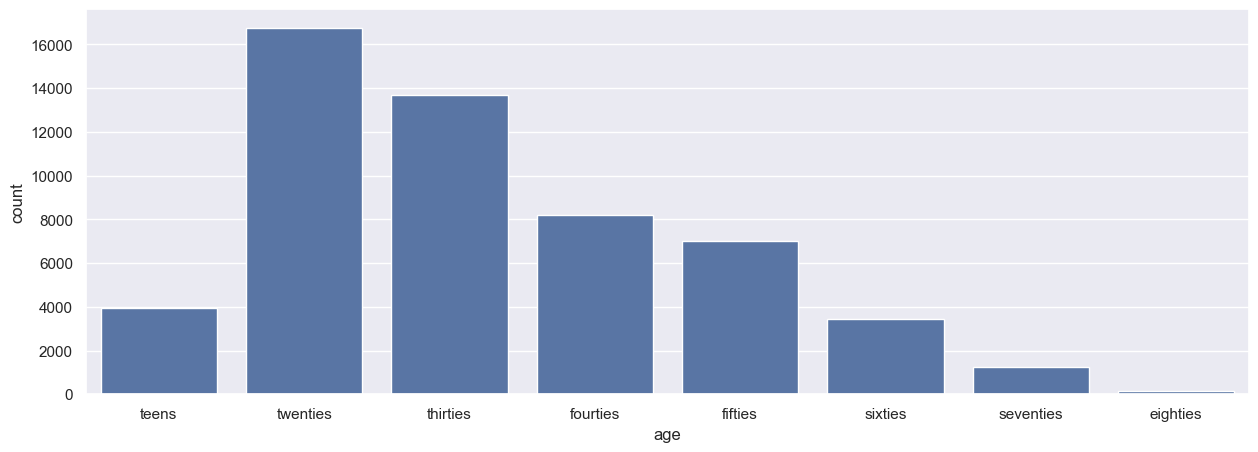

In [2]:
sns.set(rc={'figure.figsize':(15, 5)})
sns.countplot(x="age", 
        data=df[df['age'].notna()], 
        order=['teens', 'twenties', 'thirties', 'fourties', 'fifties', 'sixties', 'seventies', 'eighties'])

plt.show()


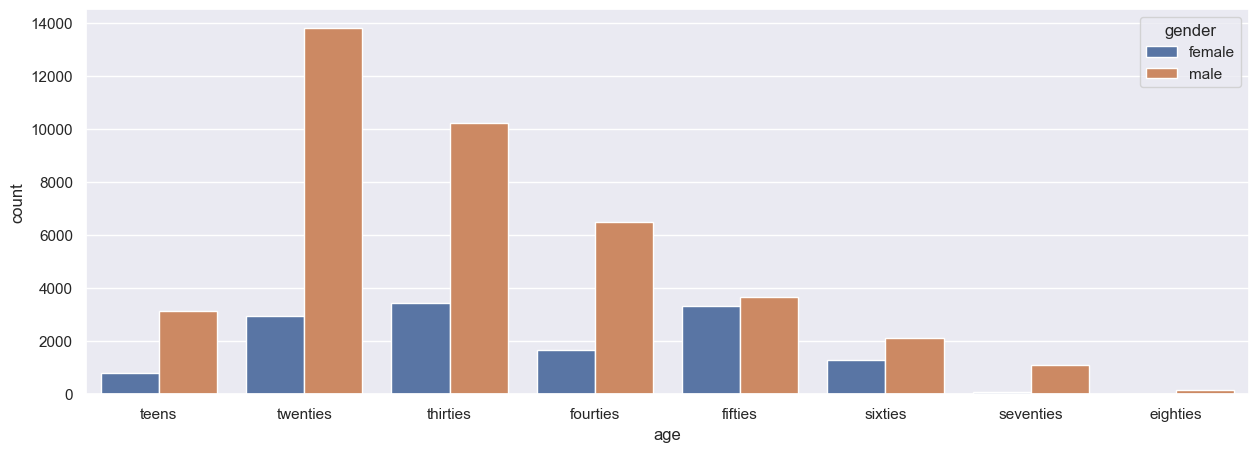

In [3]:
sns.countplot(x="age", 
        hue='gender',
        data=df[df['age'].notna()],
        order=['teens', 'twenties', 'thirties', 'fourties', 'fifties', 'sixties', 'seventies', 'eighties'])

plt.show()

initial: (54421, 25) final: (54421, 25)


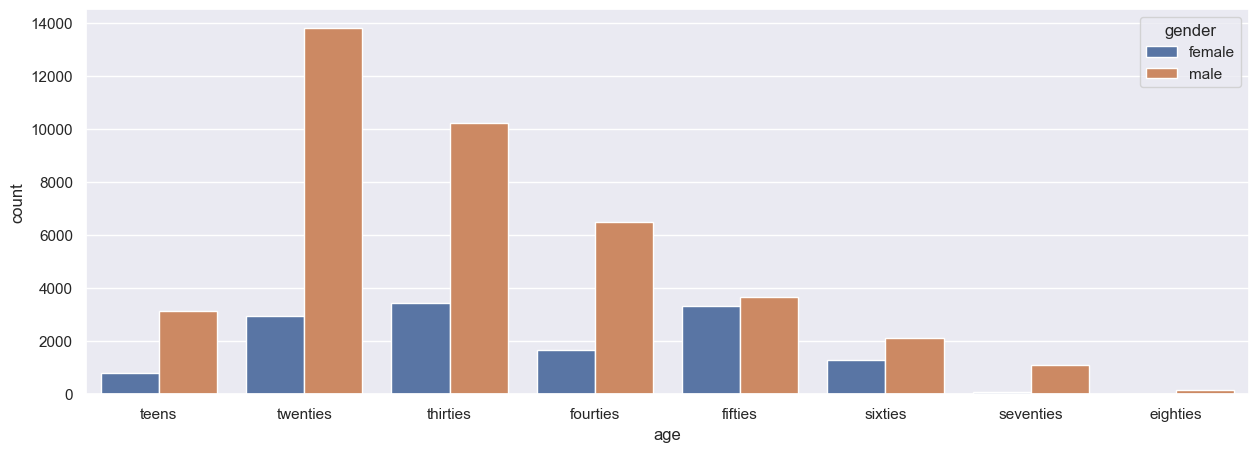

In [4]:
#del df['duration']
start=df.shape
#df.isna().sum()
end = df[df['age'].notna()].shape
print("initial: {} final: {}".format(start, end))
sns.countplot(x="age", 
        hue='gender',
        data=df[df['age'].notna()& df['gender'].notna()],
        order=['teens', 'twenties', 'thirties', 'fourties', 'fifties', 'sixties', 'seventies', 'eighties'])

plt.show()

#### **First-step findings**
We understood the dataset and also found that the dataset is imbalance. To refine the dataset for ml-model, we need to perform pre-processing in next-step.

### Data Pre-processing  
#### Data Cleaning  
In this step we drop entries(samples) with NaN values. The columns that doesn't contribute(unnecessary) to the model are removed. The attributes are checked for its datatypes and changed to an approapriate type.

In [5]:
#we extract the columns that we think useful are
#To clean the data we remove the sample with NaN attribute values.
data = df[df['age'].notna() & df['gender'].notna()]
data.reset_index(inplace=True, drop=True)
data.head()

,spectral_centroid,spectral_bandwidth,spectral_rolloff,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,...,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,gender,age
0,2825.306152,3928.282715,995.014587,-436.778717,118.968239,-14.128235,24.775040,30.152925,-16.367733,-13.281313,...,-9.980342,-12.686896,-11.602407,-4.087377,-4.877973,-4.113841,-2.776024,-7.661256,female,twenties
1,3195.045654,3484.965576,2800.683105,-266.753143,112.832596,-36.567936,11.823296,-25.162973,10.599191,-9.991164,...,-1.595940,4.655742,-1.429575,-3.109938,-10.778062,-6.814103,-11.005450,-0.427549,male,seventies
2,2507.562988,3226.625000,1773.509766,-237.324280,153.644897,-65.016083,-26.214598,30.117559,-13.242214,-23.214937,...,-10.257278,-7.798924,-9.287923,-3.678131,-1.330194,-8.286107,-7.717228,-4.699667,female,thirties
3,2822.562256,3889.874023,1171.804565,-279.279266,120.374969,7.061306,21.554234,12.693099,-1.403449,-17.706833,...,-5.141526,-1.376988,-7.463969,-6.185144,-0.798491,-7.824570,-11.113800,-1.442696,male,sixties
4,2890.035889,3998.354980,1209.936035,-131.543152,141.066132,-4.911656,60.172916,-30.647327,30.953108,-4.356675,...,6.442781,-6.174723,5.000870,-5.391839,2.402710,-4.468313,0.118594,2.645845,male,fifties


In [6]:
#data['gender'] = pd.to_numeric(data['gender'],errors = 'coerce')
#data.dtypes
#if the below code fail to covert gender datatype and values then uncomment above code
cleanup_nums = {"gender": {"male":1,"female":0,"other":0.5}}
data = data.replace(cleanup_nums)
data.head()

,spectral_centroid,spectral_bandwidth,spectral_rolloff,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,...,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,gender,age
0,2825.306152,3928.282715,995.014587,-436.778717,118.968239,-14.128235,24.775040,30.152925,-16.367733,-13.281313,...,-9.980342,-12.686896,-11.602407,-4.087377,-4.877973,-4.113841,-2.776024,-7.661256,0,twenties
1,3195.045654,3484.965576,2800.683105,-266.753143,112.832596,-36.567936,11.823296,-25.162973,10.599191,-9.991164,...,-1.595940,4.655742,-1.429575,-3.109938,-10.778062,-6.814103,-11.005450,-0.427549,1,seventies
2,2507.562988,3226.625000,1773.509766,-237.324280,153.644897,-65.016083,-26.214598,30.117559,-13.242214,-23.214937,...,-10.257278,-7.798924,-9.287923,-3.678131,-1.330194,-8.286107,-7.717228,-4.699667,0,thirties
3,2822.562256,3889.874023,1171.804565,-279.279266,120.374969,7.061306,21.554234,12.693099,-1.403449,-17.706833,...,-5.141526,-1.376988,-7.463969,-6.185144,-0.798491,-7.824570,-11.113800,-1.442696,1,sixties
4,2890.035889,3998.354980,1209.936035,-131.543152,141.066132,-4.911656,60.172916,-30.647327,30.953108,-4.356675,...,6.442781,-6.174723,5.000870,-5.391839,2.402710,-4.468313,0.118594,2.645845,1,fifties
